In [1]:
## Imports

In [2]:
import pandas as pd


In [3]:
# data = pd.read_csv("data/dataset_mood_smartphone.csv").rename(columns={"Unnamed: 0": "index", "time": "day", }).set_index("index")
# # # make seperate time and day column en make easier to understand
# data.insert(2, "time", data.day)

# check if nans
# nans = data[data.isna().any(axis=1)]
# nans

# remove the nans
# data = data.dropna()


data = pd.read_csv("data/data_processed.csv", low_memory=False).set_index("index")
data


,id,day,time,variable,value
index,,,,,
1,AS14.01,2014-02-26,13:00:00.000,mood,6.000
2,AS14.01,2014-02-26,15:00:00.000,mood,6.000
3,AS14.01,2014-02-26,18:00:00.000,mood,6.000
4,AS14.01,2014-02-26,21:00:00.000,mood,7.000
5,AS14.01,2014-02-27,09:00:00.000,mood,6.000
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19,11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26,10:19:07.434,appCat.weather,7.026


In [4]:
## dit was het spitsen van day en time en de juiste format
# data['day'] = data['day'].str.split(" ").str.get(0)
# data['time'] = data['time'].str.split(" ").str.get(1)
# data.to_csv("data/data_processed.csv")
# data


In [5]:
feature_data = data[data["variable"] != "mood"]
label_data = data[data["variable"] == "mood"]

label_data

,id,day,time,variable,value
index,,,,,
1,AS14.01,2014-02-26,13:00:00.000,mood,6.0
2,AS14.01,2014-02-26,15:00:00.000,mood,6.0
3,AS14.01,2014-02-26,18:00:00.000,mood,6.0
4,AS14.01,2014-02-26,21:00:00.000,mood,7.0
5,AS14.01,2014-02-27,09:00:00.000,mood,6.0
...,...,...,...,...,...
5637,AS14.33,2014-05-30,09:00:00.000,mood,8.0
5638,AS14.33,2014-05-30,13:00:00.000,mood,6.0
5639,AS14.33,2014-05-30,19:00:00.000,mood,8.0


In [6]:
feature_data

,id,day,time,variable,value
index,,,,,
5642,AS14.01,2014-02-26,13:00:00.000,circumplex.arousal,-1.000
5643,AS14.01,2014-02-26,15:00:00.000,circumplex.arousal,-1.000
5644,AS14.01,2014-02-26,18:00:00.000,circumplex.arousal,0.000
5645,AS14.01,2014-02-26,21:00:00.000,circumplex.arousal,1.000
5646,AS14.01,2014-02-27,09:00:00.000,circumplex.arousal,-2.000
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19,11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26,10:19:07.434,appCat.weather,7.026


array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>]], dtype=object)

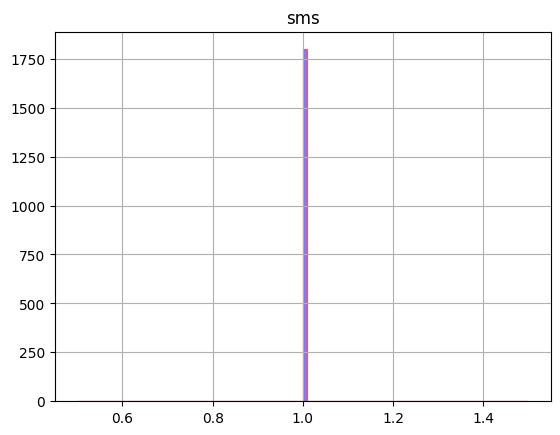

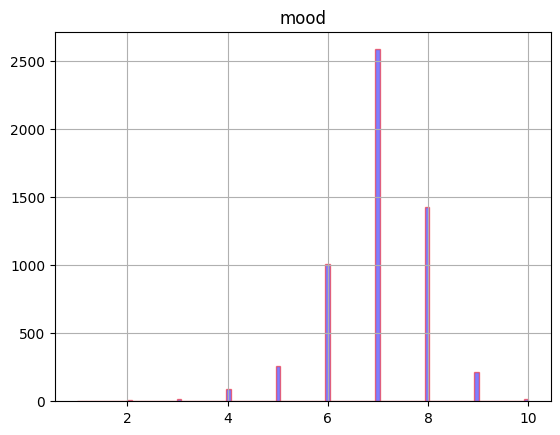

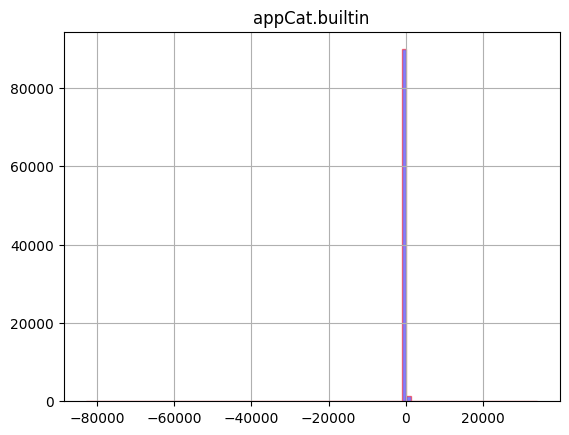

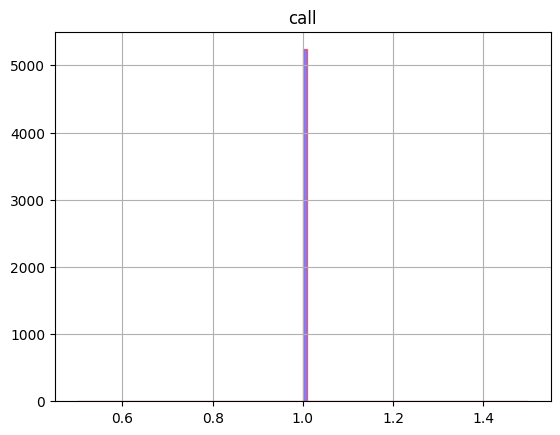

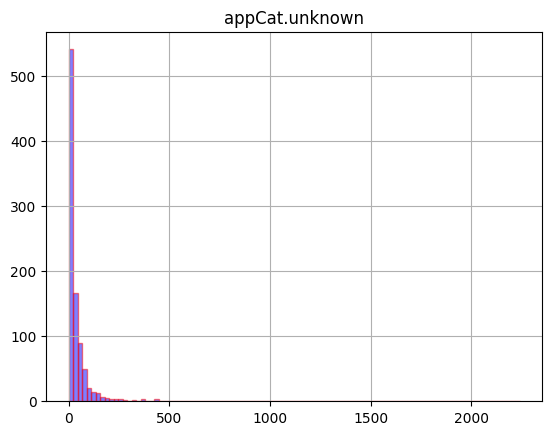

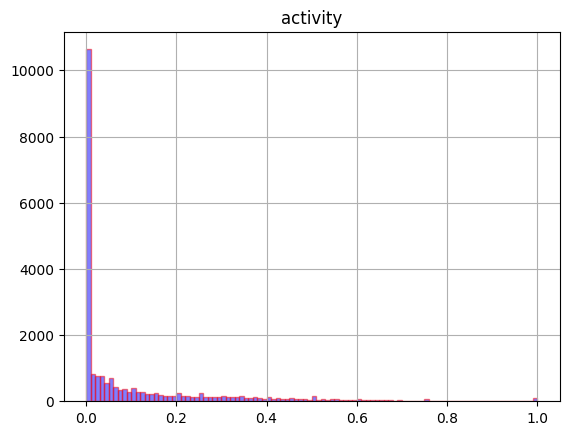

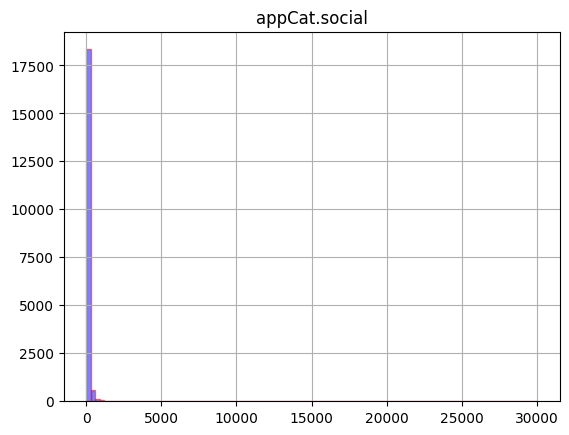

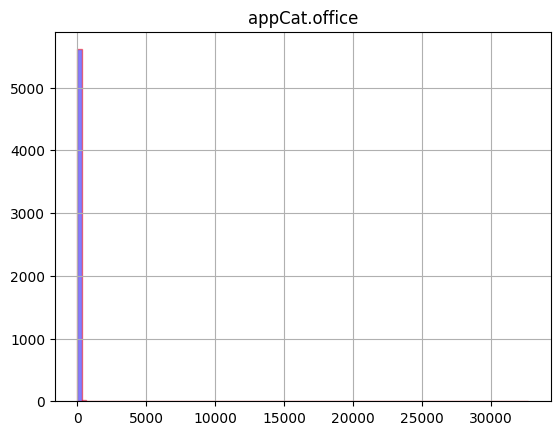

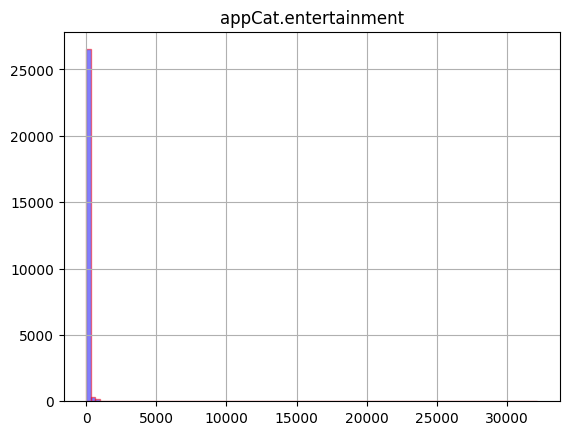

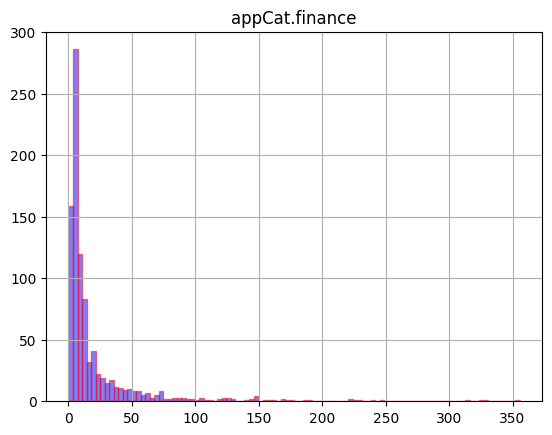

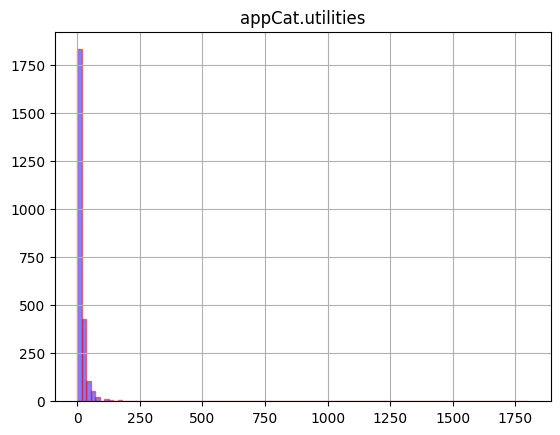

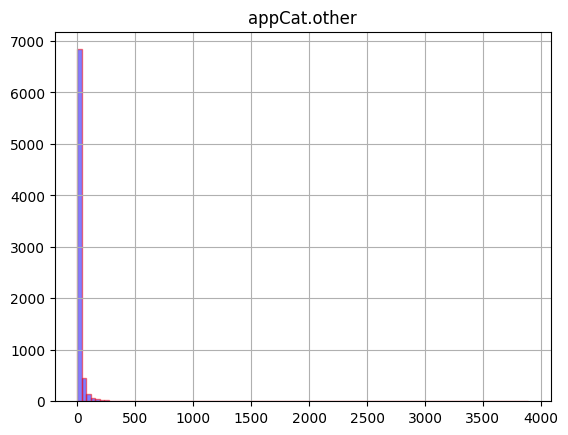

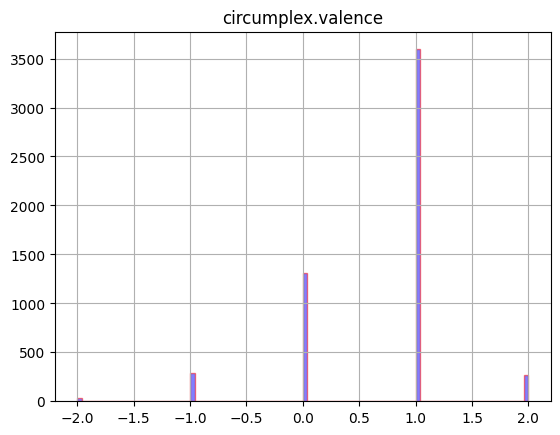

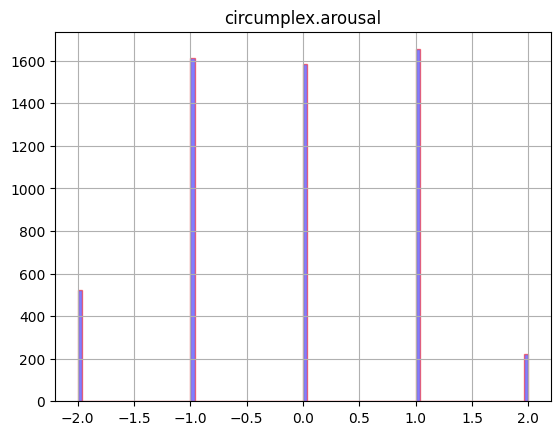

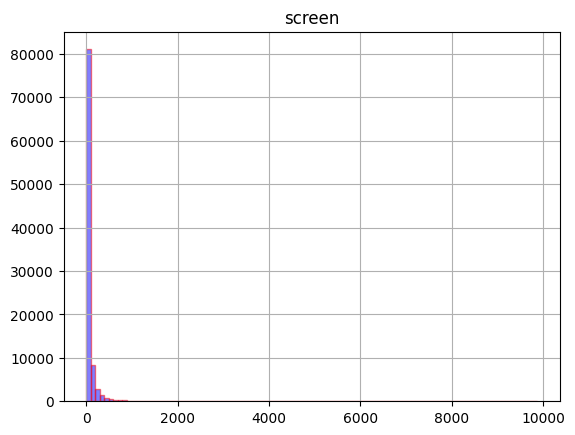

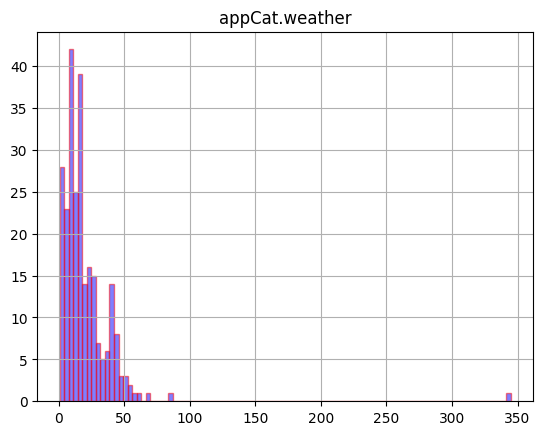

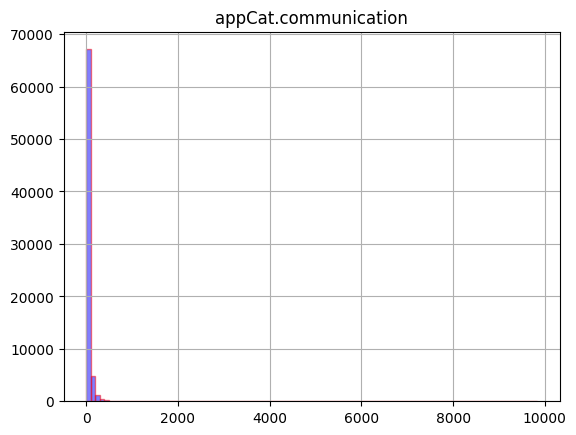

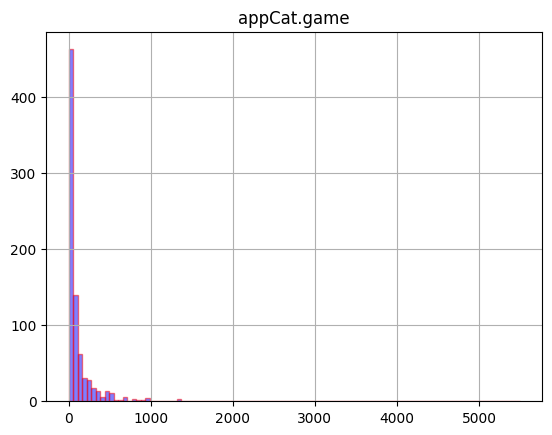

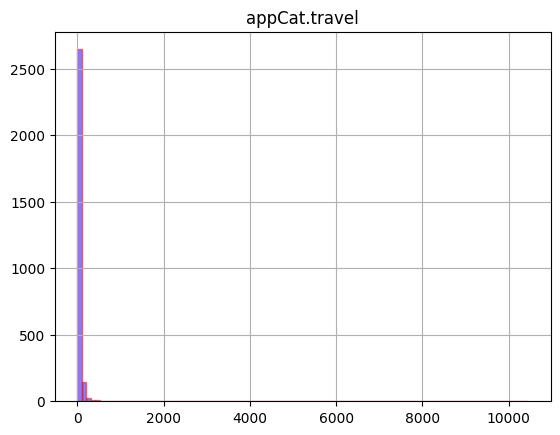

In [20]:
import matplotlib.pyplot as plt
import pylab as pl

groups = data.groupby(data.variable)
for t in set(v for v in data.variable):
    gd = groups.get_group(t)
    display(gd.hist(bins=100, edgecolor='r', alpha = 0.5, color= 'b'))
    pl.title(t)

In [8]:
## averages
aggregation_functions = {'value': 'mean'}

label_avg = label_data.groupby([label_data['id'], label_data["day"]]).aggregate(aggregation_functions)
label_avg = label_avg.rename(columns={"value": "mood_avg"})
# label_avg

In [32]:
groups = data.groupby(data.variable)

dfs = []
names = ['mood',
  'appCat.utilities',
 'appCat.social',
 'circumplex.arousal',
 'screen',
 'appCat.office',
 'call',
 'appCat.other',
 'circumplex.valence',
 'appCat.unknown',
 'sms',
 'appCat.finance',
 'appCat.builtin',
 'appCat.communication',
 'activity',
 'appCat.weather',
 'appCat.entertainment',
 'appCat.game',
 'appCat.travel']

names2 = ['mood',
  'utilities',
 'social',
 'arousal',
 'screen',
 'office',
 'call',
 'other',
 'valence',
 'unknown',
 'sms',
 'finance',
 'builtin',
 'communication',
 'activity',
 'weather',
 'entertainment',
 'game',
 'travel']

for t in names:
    df = groups.get_group(t).drop(["time", "variable"], axis=1)
    # df = df.rename(columns={"value": f"{t}"})
    dfs.append(df)

In [33]:
merged = ""
for i in range(1, 19):
    var_avg = dfs[i].groupby([dfs[i]['id'], dfs[i]["day"]]).aggregate(aggregation_functions)
    var_avg = var_avg.rename(columns={"value": f"{names2[i]}_avg"})
    if i == 1:
        merged = label_avg.join(var_avg)
    else:
        merged = merged.join(var_avg)

merged

mood_avg  utilities_avg  social_avg  arousal_avg  \
id      day                                                            
AS14.01 2014-02-26  6.250000            NaN         NaN    -0.250000   
        2014-02-27  6.333333            NaN         NaN     0.000000   
        2014-03-21  6.200000      23.029000   75.141667     0.200000   
        2014-03-22  6.400000      39.207000   36.636000     0.600000   
        2014-03-23  6.800000      30.086000   50.046611     0.200000   
...                      ...            ...         ...          ...   
AS14.33 2014-05-27  6.200000      18.724333   50.259100    -0.600000   
        2014-05-28  8.200000       5.111000   99.281685     0.000000   
        2014-05-29  7.000000       1.599500  198.880222    -1.333333   
        2014-05-30  6.800000      15.521667   75.390690    -0.800000   
        2014-05-31  7.000000            NaN         NaN    -2.000000   

                    screen_avg  office_avg  call_avg  other_avg  valence_avg  \
id      day                                                                    
AS14.01 2014-02-26         NaN         NaN       1.0        NaN     0.750000   
        2014-02-27         NaN         NaN       NaN        NaN     0.333333   
        2014-03-21  153.665872   57.402000       1.0  29.968875     0.200000   
        2014-03-22   47.613651         NaN       1.0  14.020429     0.500000   
        2014-03-23   67.067644         NaN       NaN  12.137167     0.800000   
...                        ...         ...       ...        ...          ...   
AS14.33 2014-05-27  113.607750         NaN       1.0  17.835750     0.400000   
        2014-05-28  113.657683   44.738625       1.0  27.891895     1.200000   
        2014-05-29  118.978033         NaN       1.0   9.734000     1.000000   
        2014-05-30   86.342245         NaN       1.0  10.522000    -0.400000   
        2014-05-31         NaN         NaN       NaN        NaN     1.000000   

                    unknown_avg  sms_avg  finance_avg  builtin_avg  \
id      day                                                          
AS14.01 2014-02-26          NaN      1.0          NaN          NaN   
        2014-02-27          NaN      NaN          NaN          NaN   
        2014-03-21          NaN      NaN     6.193000    14.269173   
        2014-03-22          NaN      1.0     7.025333     7.781160   
        2014-03-23          NaN      NaN    10.850750    12.134396   
...                         ...      ...          ...          ...   
AS14.33 2014-05-27          NaN      1.0          NaN     8.545776   
        2014-05-28          NaN      1.0          NaN     9.590398   
        2014-05-29          NaN      1.0          NaN     6.452161   
        2014-05-30     2.690667      NaN          NaN    14.776845   
        2014-05-31          NaN      NaN          NaN          NaN   

                    communication_avg  activity_avg  weather_avg  \
id      day                                                        
AS14.01 2014-02-26                NaN           NaN          NaN   
        2014-02-27                NaN           NaN          NaN   
        2014-03-21          55.095526      0.134050          NaN   
        2014-03-22          51.697062      0.236880          NaN   
        2014-03-23          53.442031      0.142741       30.386   
...                               ...           ...          ...   
AS14.33 2014-05-27          59.382943      0.012704          NaN   
        2014-05-28          37.238750      0.103301          NaN   
        2014-05-29          54.388125      0.169354          NaN   
        2014-05-30          46.412278      0.192901          NaN   
        2014-05-31                NaN           NaN          NaN   

                    entertainment_avg  game_avg  travel_avg  
id      day                                                  
AS14.01 2014-02-26                NaN       NaN         NaN  
        2014-02-27                NaN       NaN         NaN 

In [34]:
# merged.to_csv("data/merged.csv")

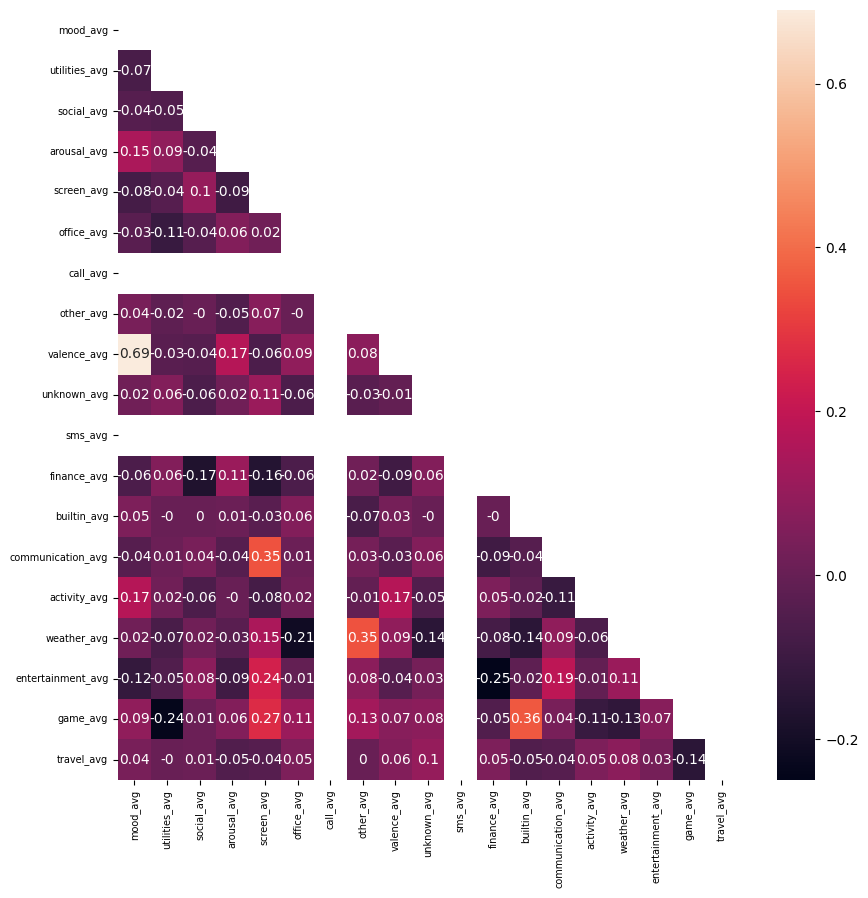

In [38]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

mat = merged.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, mask=mask)

plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 
plt.show()